# Import Dataset

In [ ]:
!pip install datasets -qq
!pip install transformers -qq

In [ ]:
from datasets import load_dataset

data = load_dataset("haryoaw/stif-indonesia", split="train")
data_val = load_dataset("haryoaw/stif-indonesia", split="dev")
data_test = load_dataset("haryoaw/stif-indonesia", split="test")

In [ ]:
from datasets import DatasetDict

# Misalkan Anda memiliki dataset: data

# Membuat objek DatasetDict dan menambahkan dataset
df_mt = DatasetDict({
    'train': data,
    'dev': data_val,
    'test': data_test
})

df_mt

DatasetDict({
    train: Dataset({
        features: ['informal', 'formal'],
        num_rows: 1922
    })
    dev: Dataset({
        features: ['informal', 'formal'],
        num_rows: 214
    })
    test: Dataset({
        features: ['informal', 'formal'],
        num_rows: 363
    })
})

In [ ]:
data

Dataset({
    features: ['informal', 'formal'],
    num_rows: 1922
})

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df_val = pd.DataFrame(data_val)
df.head(5)

,informal,formal
0,alhamdulillah stlh libur xxxnumberxxx hari onb...,alhamdulillah setelah libur xxxnumberxxx hari ...
1,selamat sore min . saya mau pesan tiket ka via...,selamat sore admin . saya mau pesan tiket ka v...
2,iya kak terimakasih . tapi tadi sudah datang k...,iya kak terima kasih . tetapi tadi sudah datan...
3,malam min xxxuserxxx xxxuserxxx situs kalian e...,"malam admin xxxuserxxx xxxuserxxx , apakah sit..."
4,"min pembelian token pln apa ada kendala , ini ...","admin , pembelian token pln apa ada kendala ? ..."


In [ ]:
df_val.head(5)

,informal,formal
0,kalian juga tdk banyak membantu terkait dengan...,kalian juga tidak banyak membantu terkait deng...
1,"kan akun lu private , jd kaga bisa liat mereka","kan akun kamu private , jadi mereka tidak bisa..."
2,min kenapa akun saya tidak ditemukan ya ? apak...,"admin , mengapa akun saya tidak ditemukan ? ap..."
3,"akun sy sdh premium , tolong cashback yg sehar...","akun saya sudah premium , tolong cashback yang..."
4,tolong cek dm yaa min . thx !,tolong periksa dm min . terima kasih !


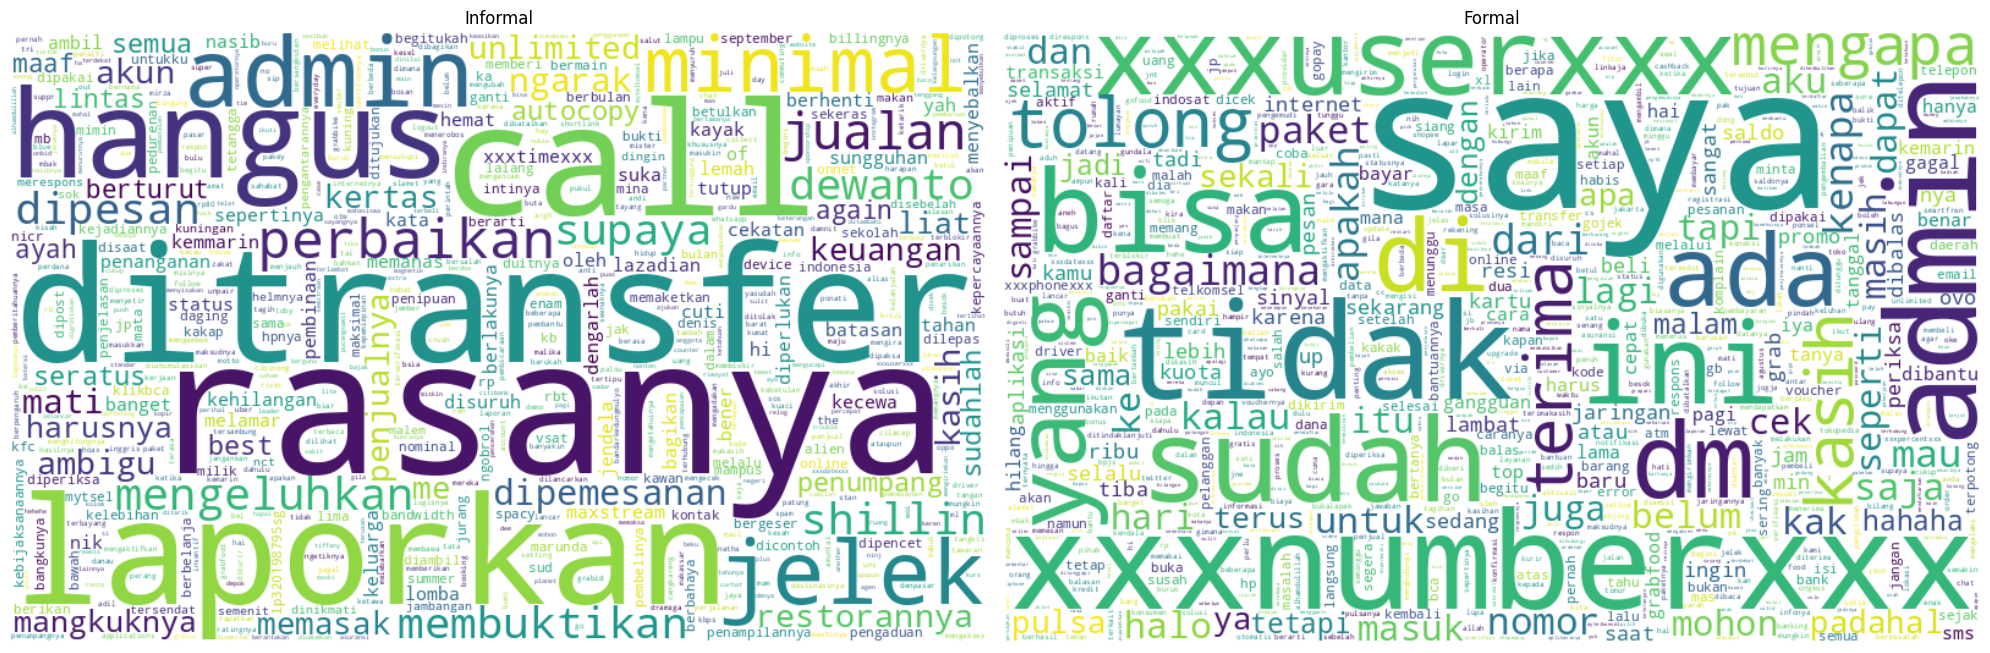

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk 'informal' dan 'formal'
X_informal = tfidf_vectorizer.fit_transform(df['informal'])
X_formal = tfidf_vectorizer.fit_transform(df['formal'])

# Mendapatkan nama fitur dan skor tf-idf
feature_names = tfidf_vectorizer.get_feature_names_out()
score_vals_informal = X_informal.toarray()
score_vals_formal = X_formal.toarray()

# Membuat kamus dengan kata sebagai kunci dan skor tf-idf sebagai nilai
word_score_informal = dict(zip(feature_names, score_vals_informal.sum(axis=0)))
word_score_formal = dict(zip(feature_names, score_vals_formal.sum(axis=0)))

# Membuat objek WordCloud
wc_informal = WordCloud(width=800, height=500, max_words=1000, background_color='white').generate_from_frequencies(word_score_informal)
wc_formal = WordCloud(width=800, height=500, max_words=1000, background_color='white').generate_from_frequencies(word_score_formal)

# Membuat figure dengan 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Menampilkan WordCloud untuk 'informal' di subplot pertama
axs[0].imshow(wc_informal, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Informal')

# Menampilkan WordCloud untuk 'formal' di subplot kedua
axs[1].imshow(wc_formal, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Formal')

# Menampilkan figure
plt.tight_layout()
plt.show()

# Fine Tuning with MarianMT

In [ ]:
!pip install sentencepiece -qq
!apt-get -qq install -y sentencepiece
!pip install sacremoses -qq

Selecting previously unselected package libsentencepiece0.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libsentencepiece0_0.1.96-1build1_amd64.deb ...
Unpacking libsentencepiece0 (0.1.96-1build1) ...
Selecting previously unselected package sentencepiece.
Preparing to unpack .../sentencepiece_0.1.96-1build1_amd64.deb ...
Unpacking sentencepiece (0.1.96-1build1) ...
Setting up libsentencepiece0 (0.1.96-1build1) ...
Setting up sentencepiece (0.1.96-1build1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbm

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "Helsinki-NLP/opus-mt-id-en"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, return_tensors="tf")

In [ ]:
# inputs = tokenizer(df_mt['train']['informal'], text_target=df_mt['train']['formal'])
# inputs

In [ ]:
len(data[1])

2

In [ ]:
max_length = 500

def preprocess_function(examples):
    inputs = [ex for ex in examples['informal']]
    targets = [ex for ex in examples['formal']]
    model_inputs = tokenizer(
        inputs, text_target=targets, max_length=max_length, truncation=True
    )
    return model_inputs

In [ ]:
tokenized_datasets = df_mt.map(
    preprocess_function,
    batched=True,
    remove_columns=df_mt['train'].column_names,
)

Map:   0%|          | 0/1922 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

Map:   0%|          | 0/363 [00:00<?, ? examples/s]

In [ ]:
from transformers import TFAutoModelForSeq2SeqLM

model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint, from_pt=True)

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFMarianMTModel.

All the weights of TFMarianMTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [ ]:
# Try
batch = data_collator([tokenized_datasets["train"][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [ ]:
# TF datasets
tf_train_dataset = model.prepare_tf_dataset(
    tokenized_datasets["train"],
    collate_fn=data_collator,
    shuffle=True,
    batch_size=32,
)
tf_eval_dataset = model.prepare_tf_dataset(
    tokenized_datasets["dev"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=16,
)

tf_test_dataset = model.prepare_tf_dataset(
    tokenized_datasets["test"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=16,
)

In [ ]:
# Evaluation
!pip install sacrebleu -qq
!pip install evaluate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 591.3 kB/s eta 0:00:00


In [ ]:
import evaluate

metric = evaluate.load("sacrebleu")

In [ ]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from transformers import DataCollatorForSeq2Seq

generation_data_collator = DataCollatorForSeq2Seq(
    tokenizer, model=model, return_tensors="tf", pad_to_multiple_of=500
)

tf_generate_dataset = model.prepare_tf_dataset(
    tokenized_datasets["dev"],
    collate_fn=generation_data_collator,
    shuffle=False,
    batch_size=8,
)


@tf.function(jit_compile=True)
def generate_with_xla(batch):
    return model.generate(
        input_ids=batch["input_ids"],
        attention_mask=batch["attention_mask"],
        max_new_tokens=500,
    )


def compute_metrics():
    all_preds = []
    all_labels = []

    for batch, labels in tqdm(tf_generate_dataset):
        predictions = generate_with_xla(batch)
        decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
        labels = labels.numpy()
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        decoded_preds = [pred.strip() for pred in decoded_preds]
        decoded_labels = [[label.strip()] for label in decoded_labels]
        all_preds.extend(decoded_preds)
        all_labels.extend(decoded_labels)

    result = metric.compute(predictions=all_preds, references=all_labels)
    return {"bleu": result["score"]}

NameError: ignored

In [ ]:
print(compute_metrics())

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import create_optimizer
from transformers.keras_callbacks import PushToHubCallback
import tensorflow as tf

# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_epochs = 100
num_train_steps = len(tf_train_dataset) * num_epochs

optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
)
model.compile(optimizer=optimizer)

# Train in mixed-precision float16
#tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [ ]:
from transformers.keras_callbacks import PushToHubCallback

callback = PushToHubCallback(
    output_dir="aditnnda/machine_translation_informal2formal", tokenizer=tokenizer
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:127: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/aditnnda/machine_translation_informal2formal into local empty directory.


In [ ]:
# Building Model - Fitting
model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    callbacks=[callback],
    epochs=num_epochs,
)

Epoch 1/100
 7/60 [==>...........................] - ETA: 30:32 - loss: 4.9606

KeyboardInterrupt: ignored

# Inferences

In [ ]:
import numpy as np


def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
!pip install datasets -qq
!pip install transformers -qq
!pip install sacrebleu -qq
!pip install evaluate -qq
!pip install sacremoses -qq
!pip install sentencepiece -qq

In [ ]:
# Inference
from transformers import pipeline
model_checkpoint = "aditnnda/machine_translation_informal2formal"
translator = pipeline("translation", model=model_checkpoint)

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at aditnnda/machine_translation_informal2formal.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


In [ ]:
# Translate the 'informal' column
translations = translator(data_test['informal'][151])

# Get the predicted translations
predictions = [translation['translation_text'] for translation in translations]

# Get the references
references = data_test['formal'][151]  # sacrebleu expects a list of references for each translation

In [ ]:
# Single Word Predict and BLEU Compute
# import evaluate

# # Load the sacrebleu metric
# metric = evaluate.load("sacrebleu")

# predictions = ["ada apa hilang , wahai provider sinyal sekali ."]
# references = [
#     [
#         "ada apa gerangan , wahai provider sinyal akhirat ?"
#     ]
# ]
# metric.compute(predictions=predictions, references=references)

{'score': 35.49481056010054,
 'counts': [6, 4, 2, 1],
 'totals': [9, 8, 7, 6],
 'precisions': [66.66666666666667,
  50.0,
  28.571428571428573,
  16.666666666666668],
 'bp': 1.0,
 'sys_len': 9,
 'ref_len': 9}

In [ ]:
import pandas as pd

# Create a dictionary from translations and references
data = {
    'preds': [translation['translation_text'] for translation in translations],
    'labels': [reference for reference in references]
}

# Create a DataFrame from the dictionary
eval_preds = pd.DataFrame(data)

# Print the DataFrame
eval_preds

In [ ]:
from sacrebleu import sentence_bleu

# Function to compute BLEU score for a row
def compute_bleu(row):
    return sentence_bleu(row['preds'], [row['labels']]).score

# Compute BLEU score for each row and add it as a new column
eval_preds['BLEU'] = eval_preds.apply(compute_bleu, axis=1)

# Print the DataFrame
eval_preds

In [ ]:
import numpy as np
print(f'Mean BLEU from MarianMT model is: {np.mean(eval_preds["BLEU"])}%')
#np.round(np.mean(eval_preds['BLEU'])/100,4)

Mean BLEU from MarianMT model is: 36.13305936515194%


In [ ]:
# Convert ke Excel
eval_preds.to_excel('Skor BLEU 251 sampai selesai.xlsx',index=False)

*The End of Predicting on Testing Data,  Finally*😎 Got 41,63663262% from Fine Tuning with MarianMT 🤗 Model

## Trash

In [ ]:
data_test['informal'][51]

'udah masuk email pemberitahuannya suruh cek lagi tetep saldo ga berubah , tapi yasudahlah tak mengapa'

In [ ]:
eval_preds.iloc[:,[0,1]]

,preds,labels
0,apakah belum ada konfirmasi lagi admin ?,"belum ada konfirmasi lagikah , admin ?"
1,matikan notifikasi yang itu . kemarin juga sam...,matikan notifikasi yang itu . kemarin juga sam...
2,"kak , untuk keluhan telkomsel , tolong konfirm...","kak , untuk keluhan telkomsel , silahkan konfi..."
3,another attempung terus . kredit penipuan atas...,percobaan penipuan lainnya . potensi penipuan ...
4,"tolong , sudah xxxnumberxxx xxxnumberxxx x sep...","tolong ! sudah seperti ini , kenapa ?"
5,parah driver xxxuserxxx terimakasih di tetapi ...,para pengemudi xxxuserxxx dipersilahkan duduk ...
6,"admin , informasi resi id191432421909e . soaln...","admin , mohon info resi id191432841909e ! kare..."
7,hal yang lebih cepat dari gundala : hilang kod...,"hal yang lebih cepat dari gundala , habisnya k..."
8,"berisikan kirim ? kita di twitter kak , buka ig .","geser ke kiri ? kita di twitter kak , bukan in..."
9,telah laporan pulsa tersedot terus . bangsat .,capai laporan pulsa yang tertelan terus . sial...


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
tokenized_test = tokenizer(eval_preds[['preds','labels']], padding=True, truncation=True, return_tensors="tf")

NameError: ignored

In [ ]:
# Load the tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
token_pred = tokenizer(list(eval_preds['preds']), padding=True, truncation=True, return_tensors="tf").input_ids
token_labels = tokenizer(list(eval_preds['labels']), padding=True, truncation=True, return_tensors="tf").input_ids

# Compute the metrics
result = compute_metrics((token_pred,token_labels))
print(result)

ValueError: ignored

In [ ]:
from sacrebleu import corpus_bleu
# Compute BLEU score
bleu_score = np.mean(corpus_bleu(predictions, references).score)

print(f"Average BLEU Score: {bleu_score}")

In [ ]:
from datasets import load_metric
# Load metric
metric = load_metric("sacrebleu")

# Compute BLEU score
results = metric.compute(predictions=predictions, references=references)
bleu_score = results["score"]

print(f"Average BLEU Score: {bleu_score}")

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
inputs = tokenizer(data_test['informal'], padding=True, truncation=True, return_tensors="tf").input_ids

In [ ]:
del(inputs)

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

In [ ]:
from transformers import TFAutoModelForSeq2SeqLM

model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
outputs = model.generate(inputs)

ResourceExhaustedError: ignored

In [ ]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
optimum-cli export openvino --model aditnnda/machine_translation_informal2formal ov_model

SyntaxError: ignored

In [ ]:
!pip install optimum -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.3/403.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install optimum[intel]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install openvino -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install onnx -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
!pip instal sacremoses -qq

ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
!optimum-cli export openvino --model aditnnda/machine_translation_informal2formal --task text2text-generation ov_model

2023-12-24 07:23:49.961395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 07:23:49.961563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 07:23:49.966438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 07:23:53.289756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Framework not specified. Using tf to export to ONNX.
All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at aditnnda/machine_translation_infor

In [ ]:
# OV Optimizer
from transformers import AutoTokenizer, pipeline
from optimum.intel.openvino import OVModelForSeq2SeqLM

model_id = "aditnnda/machine_translation_informal2formal"
model = OVModelForSeq2SeqLM.from_pretrained(model_id, from_transformers=True)
tokenizer = AutoTokenizer.from_pretrained(model_id)

translation_pipe = pipeline("translation", model=model, tokenizer=tokenizer)
text = "belum ada konfirmasi lagi kah min ?"
result = translation_pipe(text)

The argument `from_transformers` is deprecated, and will be removed in optimum 2.0.  Use `export` instead
Framework not specified. Using tf to export to ONNX.
All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at aditnnda/machine_translation_informal2formal.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


KeyError: ignored

In [ ]:
# Save the exported model
save_directory = "a_local_path"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

[{'translation_text': "Il n'est jamais sorti sans un livre sous son bras, et il est souvent revenu avec deux."}]

# [Failed] GPT 2

## OSCAR Datasets

In [ ]:
oscar_id = load_dataset("oscar", "unshuffled_deduplicated_id", split="train")

Generating train split:   0%|          | 0/9948521 [00:00<?, ? examples/s]

In [ ]:
oscar_id_10 = load_dataset("oscar", "unshuffled_deduplicated_id", split="train[:10%]")

In [ ]:
# Saving Data
import pickle

# Simpan dataset ke dalam file
with open('oscar_dataset.pkl', 'wb') as f:
    pickle.dump(oscar_id, f)

In [ ]:
# # Muat dataset dari file
# with open('oscar_dataset.pkl', 'rb') as f:
#     oscar_id_ = pickle.load(f)

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# def tokenize_function(examples):
#   return tokenizer(examples['text'])

def tokenize_function(examples):
    # Potong teks menjadi potongan dengan panjang maksimum 1024
    tokens = tokenizer(examples['text'], truncation=True, max_length=1024)
    return tokens

tokenized_dataset = oscar_id_10.map(tokenize_function, batched=True)
# encoded_input = tokenizer(oscar_id, return_tensors='tf')

Map:   0%|          | 0/994852 [00:00<?, ? examples/s]

In [ ]:
# # Fitting Data Oscar ke GPT-2
# model = TFGPT2Model.from_pretrained('gpt2')
# output = model(tokenized_dataset)

In [ ]:
# !pip install transformers[torch] -qq
# !pip install accelerate -U -qq
!apt-get -qq install -y transformers[torch]
!apt-get -qq install -y accelerate -U

E: Unable to locate package transformers[torch]
E: Couldn't find any package by glob 'transformers[torch]'
E: Couldn't find any package by regex 'transformers[torch]'
E: Command line option 'U' [from -U] is not understood in combination with the other options.


In [ ]:
!pip install transformers -U
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.0
    Uninstalling transformers-4.30.0:
      Successfully uninstalled transformers-4.30.0


In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments

# Muat model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Tentukan argumen pelatihan
training_args = TrainingArguments(
    output_dir="./gpt2-oscar",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    save_steps=10_000,
    save_total_limit=2,
)

# Buat trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
)

# Latih model
trainer.train()

ImportError: ignored

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import tensorflow as tf

# # Muat tokenizer dan model
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# model = TFGPT2LMHeadModel.from_pretrained('gpt2')

# # Tokenisasi dataset Anda
# def tokenize_function(examples):
#     # Potong teks menjadi potongan dengan panjang maksimum 1024
#     tokens = tokenizer(examples['text'], truncation=True, max_length=1024)
#     return tokens

# tokenized_dataset = oscar_id_10.map(tokenize_function, batched=True)

# Konversi dataset ke format yang dapat digunakan oleh TensorFlow
def convert_to_tf_format(examples):
    # Konversi fitur ke format yang dapat digunakan oleh TensorFlow
    input_ids = tf.convert_to_tensor(examples['input_ids'])
    attention_mask = tf.convert_to_tensor(examples['attention_mask'])
    return {'input_ids': input_ids, 'attention_mask': attention_mask}

tf_dataset = tokenized_dataset.map(convert_to_tf_format)

Map:   0%|          | 0/994852 [00:00<?, ? examples/s]

AttributeError: ignored

In [ ]:
import tensorflow as tf

# Tentukan argumen pelatihan
BATCH_SIZE = 8
EPOCHS = 5

# Konfigurasi dataset untuk pelatihan dengan TensorFlow
#tf_dataset = tf_dataset.shuffle(1000).batch(BATCH_SIZE)

# # Latih model
# optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
# model.compile(optimizer=optimizer, loss=model.compute_loss)
# model.fit(tf_dataset, epochs=EPOCHS)
# Latih model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5))
model.fit(tf_dataset, epochs=EPOCHS)

ValueError: ignored

In [ ]:
model = TFGPT2Model.from_pretrained('gpt2')
output = model(tf_dataset)

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


ValueError: ignored

In [ ]:
import os
import tensorflow as tf

# Tentukan lokasi untuk menyimpan dataset
path = os.path.join(os.getcwd(), "my_folder")

# # Buat direktori jika belum ada
# os.makedirs(path, exist_ok=True)

# Simpan dataset
tf.data.experimental.save(dataset=tf_dataset, path=path)

# # Muat dataset
# new_dataset = tf.data.experimental.load(path, tf.TensorSpec(shape=(), dtype=tf.int64))

In [ ]:
import os
import tensorflow as tf

# Tentukan lokasi untuk menyimpan dataset
path = os.path.join(os.getcwd(), "my_folder")

# Buat direktori jika belum ada
os.makedirs(path, exist_ok=True)

# Simpan dataset
tf.data.experimental.save(dataset=tf_dataset, path=path)

# # Muat dataset
# new_dataset = tf.data.experimental.load(path, tf.TensorSpec(shape=(), dtype=tf.int64))

In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments

model = GPT2LMHeadModel.from_pretrained('gpt2')

training_args = TrainingArguments(
    output_dir="./gpt2-oscar",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
)

trainer.train()

In [ ]:
tf_dataset

Dataset({
    features: ['id', 'text', 'input_ids', 'attention_mask'],
    num_rows: 994852
})

In [ ]:
import os
import tensorflow as tf

# Tentukan lokasi untuk menyimpan dataset
path = os.path.join(os.getcwd(), "saved_data")

# Simpan dataset
tf.data.experimental.save(dataset=tf_dataset, path=path)

# Muat dataset
new_dataset = tf.data.experimental.load(path, tf.TensorSpec(shape=(), dtype=tf.int64))

AttributeError: ignored

In [ ]:
from transformers import GPT2Tokenizer, TFGPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
print(output)

# [Failed] GPT-2 STIF

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

# Membuat tokenizer dan model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2LMHeadModel.from_pretrained('gpt2')

# Menambahkan token padding
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Mengubah ukuran embedding model
model.resize_token_embeddings(len(tokenizer))

def tokenize_function(examples):
    # Tokenisasi teks dan konversi ke tensor TensorFlow
    informal_tokens = tokenizer(examples['informal'], return_tensors='tf', padding=True, truncation=True)['input_ids'].numpy().tolist()
    formal_tokens = tokenizer(examples['formal'], return_tensors='tf', padding=True, truncation=True)['input_ids'].numpy().tolist()
    return {"informal": informal_tokens, "formal": formal_tokens}

# Menerapkan fungsi tokenisasi ke semua teks dalam dataset Anda
tokenized_dataset = data.map(tokenize_function, batched=True)
tokenized_dataset_val = data_val.map(tokenize_function, batched=True)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Map:   0%|          | 0/214 [00:00<?, ? examples/s]

In [ ]:
import tensorflow as tf
def convert_to_tf_dataset(dataset):
    features = {x: 'int32' for x in dataset.features}
    tf_dataset = tf.data.Dataset.from_generator(lambda: dataset, features)
    return tf_dataset

# # Mengubah dataset menjadi tf.data.Dataset
# tf_train_dataset = convert_to_tf_dataset(tokenized_dataset)
# tf_val_dataset = convert_to_tf_dataset(tokenized_dataset_val)

# Mengubah dataset menjadi tf.data.Dataset
train_data = tf.data.Dataset.from_tensor_slices((tokenized_dataset['informal'], tokenized_dataset['formal']))
eval_data = tf.data.Dataset.from_tensor_slices((tokenized_dataset_val['informal'], tokenized_dataset_val['formal']))

# Mengkompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Melatih model
model.fit(train_data.batch(16), epochs=3)
# Membuat argumen pelatihan
args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)
# Membuat trainer
trainer = TFTrainer(
    model=model,
    args=args,
    train_dataset=train_data,
    eval_dataset=eval_data
)

# Melatih model
trainer.train()

ValueError: ignored

In [ ]:
from transformers import TFGPT2LMHeadModel, TFTrainingArguments, TFTrainer

# Membuat model
model = TFGPT2LMHeadModel.from_pretrained('gpt2')

# Membuat argumen pelatihan
args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Membuat trainer
trainer = TFTrainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset_val
)

# Melatih model
trainer.train()

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/trainer_tf.py:118: FutureWarning: The class `TFTrainer` is deprecated and will be removed in version 5 of Transformers. We recommend using native Keras instead, by calling methods like `fit()` and `predict()` directly on the model object. Detailed examples of the Keras style can be found in our examples at https://github.com/huggingface/transformers/tree/main/examples/tensorflow
  warnings.warn(


AttributeError: ignored

# [Failed] MarianMT

In [ ]:
from transformers import MarianModel, MarianConfig

# Initializing a Marian Helsinki-NLP/opus-mt-en-de style configuration
configuration = MarianConfig()

# Initializing a model from the Helsinki-NLP/opus-mt-en-de style configuration
model = MarianModel(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
!pip install sentencepiece -qq
!apt-get -qq install -y sentencepiece

In [ ]:
#!pip install sentencepiece -qq
from transformers import MarianForCausalLM, MarianTokenizer

model = MarianForCausalLM.from_pretrained("Helsinki-NLP/opus-mt-id-en")
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-zh")
src_texts = ["I am a small frog.", "Tom asked his teacher for advice."]
tgt_texts = ["Ich bin ein kleiner Frosch.", "Tom bat seinen Lehrer um Rat."]  # optional
inputs = tokenizer(tokenized_dataset, text_target=tokenized_dataset_val, return_tensors="pt", padding=True)

outputs = model(**inputs)  # should work

ImportError: ignored

In [ ]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

# English sentence to be translated to French
sentence = "Hello, how are you?"

# Encode the sentence
inputs = tokenizer.encode(sentence, return_tensors='tf')

# Generate translation
outputs = model.generate(inputs, max_length=40, num_return_sequences=1, temperature=0.7)

# Decode the output
translation = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(translation)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Hello, how are you?

I'm a little bit of a nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd


In [ ]:
!pip install datasets -qq
!pip install transformers -qq
!pip install sacrebleu -qq
!pip install evaluate -qq
!pip install sentencepiece -qq
!apt-get -qq install -y sentencepiece
!pip install sacremoses -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.5 MB/s eta 0:00:00
Selecting previously unselected package libsentencepiece0.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../libsentencepiece0_0.1.96-1build1_amd64.deb ...
Unpacking libsentencepiece0 (0.1.96-1build1) ...
Selecting previously unselected package sentencepiece.
Preparing to unpack .../sentencepiece_0.1.96-1build1_amd64.deb ...
Unpacking sentencepiece (0.1.96-1build1) ...
Setting up libsentencepiece0 (0.1.96-1build1) ...
Setting up sentencepiece (0.1.96-1build1) ...

In [ ]:
# Inference
from transformers import pipeline
model_checkpoint = "aditnnda/machine_translation_informal2formal"
translator = pipeline("translation", model=model_checkpoint)

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/291M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at aditnnda/machine_translation_informal2formal.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

In [ ]:
import evaluate

metric = evaluate.load("sacrebleu")

In [ ]:
translator('halo kenapa simpati akhir2 ini didaerah saya lemot sekalii')

[{'translation_text': 'halo , kenapa simpati akhir - akhir ini di daerah saya lambat sekali .'}]

In [ ]:
predictions = ["halo , kenapa simpati akhir - akhir ini di daerah saya lambat sekali ."]
references = [
    [
        "halo . kenapa simpati akhir - akhir ini di daerah saya lambat sekali ?"
    ]
]
metric.compute(predictions=predictions, references=references)

{'score': 79.00555574972935,
 'counts': [13, 10, 9, 8],
 'totals': [14, 13, 12, 11],
 'precisions': [92.85714285714286, 76.92307692307692, 75.0, 72.72727272727273],
 'bp': 1.0,
 'sys_len': 14,
 'ref_len': 14}